# Artifact Removal

Deep learning-based computer-aided diagnosis (CADx) performance derives from its ability to accurately detect, and classify abnormalities in breast tissue from digital mammograms. Forgive the anthropomorphism, but when a model “sees” an image, it must distinguish a region or regions of interest, each with distinct properties, from the background, text, and other artifacts of the scanning process. The presence of such artifacts challenges model-based detection and can lead to classification errors.

To get a sense of the challenge, note the artifacts in the following four randomly sampled images from the CBIS-DDSM dataset.

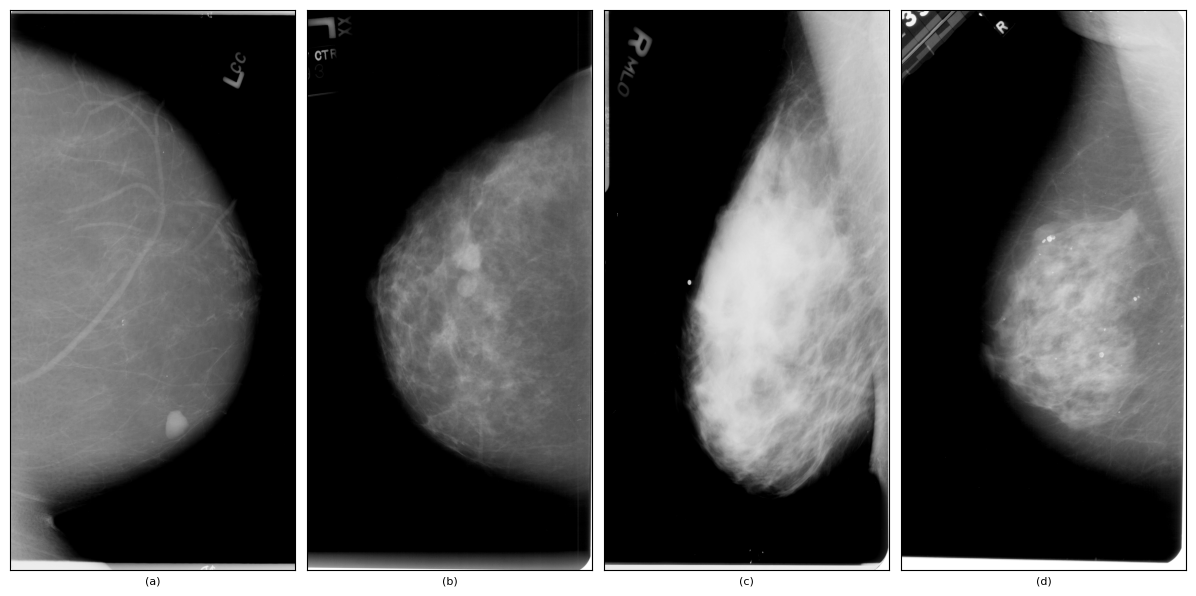

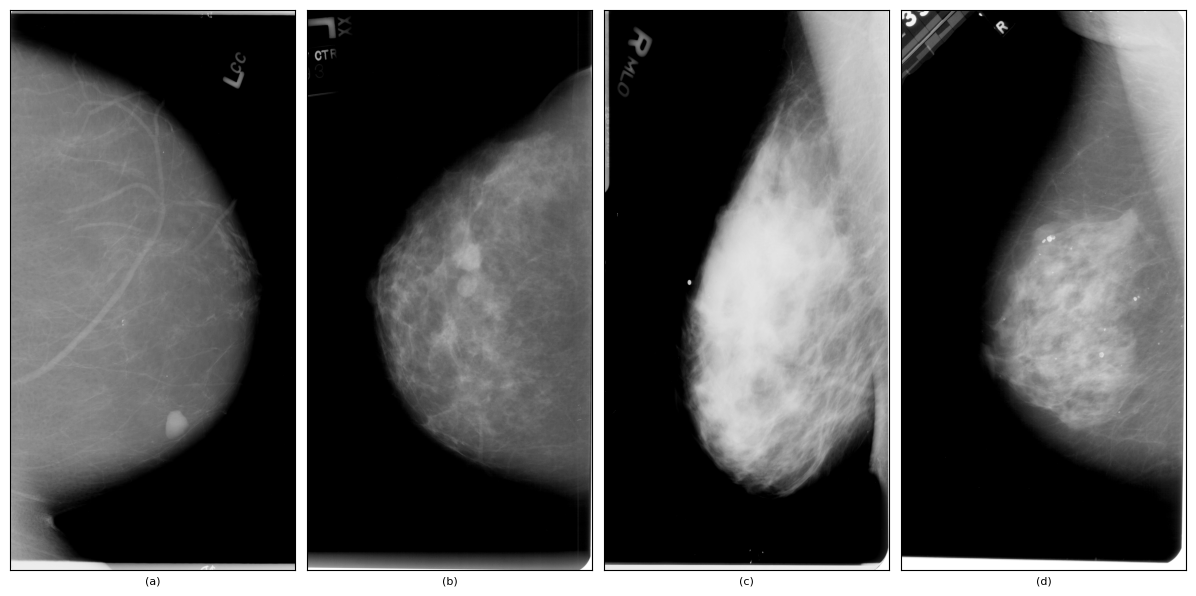

In [1]:
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../../../..")))

import numpy as np
import cv2
import matplotlib.pyplot as plt
from bcd.utils.image import convert_uint8
from myst_nb import glue

img1 = "data/image/1_dev/converted/train/benign/347c2455-cb62-40f8-a173-9e4eb9a21902.png"
img2 = "data/image/1_dev/converted/train/benign/4ed91643-1e06-4b2c-8efb-bc60dd9e0313.png"
img3 = "data/image/1_dev/converted/train/malignant/7dcc12fd-88f0-4048-a6ab-5dd0bd836f08.png"
img4 = "data/image/1_dev/converted/train/malignant/596ef5db-9610-4f13-9c1a-4c411b1d957c.png"

img1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img3, cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread(img4, cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,6))
_ = axes[0].imshow(img1, cmap='gray', aspect='auto')
_ = axes[1].imshow(img2, cmap='gray',aspect='auto')
_ = axes[2].imshow(img3, cmap='gray',aspect='auto')
_ = axes[3].imshow(img4, cmap='gray',aspect='auto')

labels = np.array(["(a)", "(b)", "(c)", "(d)"])
for i in range(4):
    _ = axes[i].set_xlabel(labels[i])
    _ = axes[i].set_xticks([])
    _ = axes[i].set_yticks([])


plt.tight_layout()

glue("artifacts", fig)

```{glue:figure} artifacts
---
align: center
name: artifacts_fig
---
Artifacts in Mammogram Images
```

The images in {numref}`artifacts_fig` are not edge cases. Text and such artifacts were extant in 79 out of 88 (~89%) randomly sampled images from the CBIS-DDSM dataset.

Before modeling and inference can take place, the breast tissue must be isolated and segmented annotations, and any artifacts that may compromise the detection and classification of anomalies in the mammogram.

In this section, we describe a two-step process for removing artifacts.

1. **Thresholding**: Partition the original grayscale image a binary image with two regions: a foreground region containing the breast region of interest, and a background region, using thresholding and binarization.
2. **Breast Segmentation**: From the binary image, detect the breast contours using a border following algorithm {cite}`suzukiTopologicalStructuralAnalysis1985` and segment the breast from artifacts.